# Spotify Final Project
### Milestone 3: EDA and Baseline Model
### Austin Rochon, Emily Xie, and Mark Lock

#### 0. Import requisite packages

In [10]:
import glob
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

#### 1. Load and clean data

In [11]:
# Load all 4 playlist csvs into a sindle dataframe
filepath = "../data"
all_files = glob.glob(filepath + "/*.csv")
all_data = []

print(all_files)


for filename in all_files:
    df = pd.read_csv(filename, index_col=None, header=0)
    all_data.append(df)
    
playlists = pd.concat(all_data, axis=0, ignore_index=True)


print(f"""Shape of raw playlist data: {playlists.shape}""")
playlists.head()

['../data/1000-1999.csv', '../data/0-999.csv', '../data/2000-2999.csv', '../data/3000-3999.csv']
Shape of raw playlist data: (266386, 4)


,trackid,artist_name,track_name,pid
0,spotify:track:5IbCV9Icebx8rR6wAp5hhP,Original Broadway Cast - The Little Mermaid,Fathoms Below - Broadway Cast Recording,1000
1,spotify:track:6rKVAvjHcxAzZ1BHtwh5yC,Original Broadway Cast - The Little Mermaid,Daughters Of Triton - Broadway Cast Recording,1000
2,spotify:track:6Jlkb1Wh08RYHstWScsTvg,Original Broadway Cast - The Little Mermaid,The World Above - Broadway Cast Recording,1000
3,spotify:track:0XhC8bfStML9ygBmfOt1JJ,Original Broadway Cast - The Little Mermaid,Human Stuff - Broadway Cast Recording,1000
4,spotify:track:0ABxAcsRWlqckkyONsfP67,Original Broadway Cast - The Little Mermaid,I Want the Good Times Back - Broadway Cast Rec...,1000


Okay, now that we've loaded our data, let's dig into our playlists a little bit. First, let's examine song counts by playlist

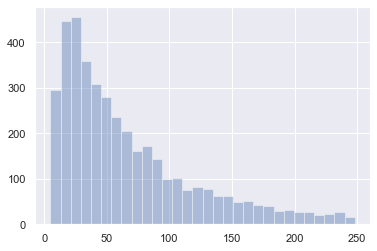

In [12]:
trackcounts_by_playlist = playlists[["pid", "trackid"]].groupby(["pid"]).agg(["count"])

sns.set(color_codes=True)
sns.distplot(trackcounts_by_playlist, kde=False);


In [13]:
trackcounts_by_playlist.describe()

,trackid
,count
count,4000.000000
mean,66.596500
std,53.581727
min,5.000000
25%,26.000000
50%,50.000000
75%,91.000000
max,248.000000


Now, let's look at our data on song level. Specifically, we'll want to know how many songs are unique.

In [14]:
counts_by_track = playlists.groupby("trackid").count()
counts_by_track["count_freq"] = counts_by_track["pid"]
counts_by_track[["count_freq"]].sort_values(by="count_freq", ascending=False)

,count_freq
trackid,
spotify:track:7BKLCZ1jbUBVqRi2FVlTVw,192
spotify:track:7KXjTSCq5nL1LoYtL7XAwS,178
spotify:track:1xznGGDReH1oQq0xzbwXa3,171
spotify:track:7yyRTcZmCiyzzJlNzGC9Ol,151
spotify:track:4Km5HrUvYTaSUfiSGPJeQR,147
spotify:track:3a1lNhkSLSkpJE4MSHpDu9,147
spotify:track:5hTpBe8h35rJ67eAWHQsJx,146
spotify:track:6O6M7pJLABmfBRoGZMu76Y,137
spotify:track:6eT7xZZlB2mwyzJ2sUKG6w,133


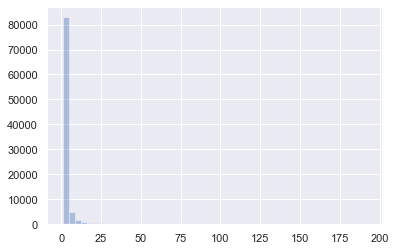

In [15]:
sns.distplot(counts_by_track[["count_freq"]], kde=False);

Now that we have our playlist data loaded, we'll need to fetch some song attributes for each song. For that, we can use the Spotify API. First, let's dump our consolidated playlist data to a csv

In [16]:
playlists.to_csv("../data/playlists_merged.csv")
playlists.sample(1000).to_csv("../data/playlists_merged_sample.csv")